## Importing  Libraries:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

In [4]:
from sklearn.preprocessing import StandardScaler
Sd=StandardScaler()
import warnings
warnings.filterwarnings('ignore')

In [56]:
cars = pd.read_csv('carsEDA.csv')
cars.head(7)

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,Registration,City,Original_Price,Sales_Price,Month,EMI(₹)
0,Maruti New Wagon-R LXI CNG 1.0 L,2020,Maruti,MANUAL,20724,Petrol + CNG,1st Owner,DL-1C,New Delhi,594699,594699,Sep,11626
1,Maruti Celerio ZXI OPT AMT,2017,Maruti,AUTOMATIC,87848,Petrol,1st Owner,TS-08-x-xxxx,Hyderabad,465799,454899,Jan,8893
2,Hyundai i10 ERA 1.1 IRDE,2010,Hyundai,MANUAL,60476,Petrol,2nd Owner,KL-40,Kochi,229099,193099,Aug,3775
3,Maruti Alto 800 LXI,2013,Maruti,MANUAL,40700,Petrol,1st Owner,TN-12-x-xxxx,Chennai,256699,256699,Jul,5019
4,Mahindra XUV 3OO W8 (O) AT,2021,Mahindra,MANUAL,4022,Petrol,1st Owner,MH-12,Pune,1213099,1213099,Dec,22781
5,Skoda Rapid AMBITION 1.6 MPFI MT,2017,Skoda,MANUAL,46204,Petrol,1st Owner,KL-07,Kochi,611199,611199,Apr,11949
6,Volkswagen Polo HIGHLINE1.2L PETROL,2013,Volkswagen,MANUAL,39352,Petrol,2nd Owner,MH-01,Mumbai,388299,388299,Apr,7591


## Visualization:

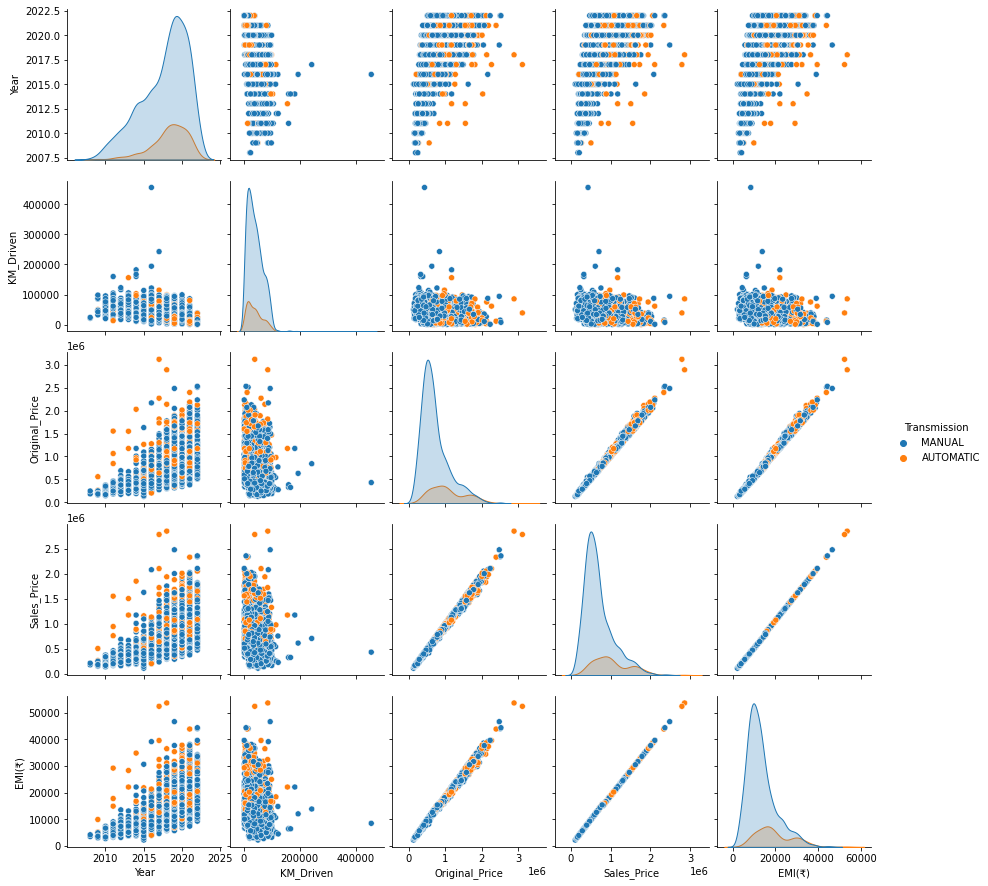

In [6]:
sns.pairplot(cars, hue='Transmission')

<AxesSubplot:>

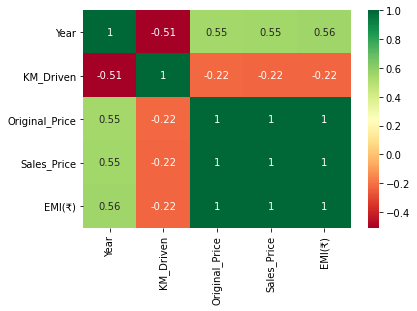

In [7]:
corrmat = cars.corr()
top_corr_features = corrmat.index
sns.heatmap(cars[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Checking relationship of Company with Sales Price

In [8]:
cars['Company'].unique()

array(['Maruti', 'Hyundai', 'Mahindra', 'Skoda', 'Volkswagen', 'Ford',
       'Tata', 'Renault', 'Toyota', 'MG', 'Honda', 'Nissan', 'KIA',
       'Jeep', 'SKODA', 'Jaguar', 'Datsun', 'MARUTI', 'Mercedes', 'Fiat',
       'Chevrolet'], dtype=object)

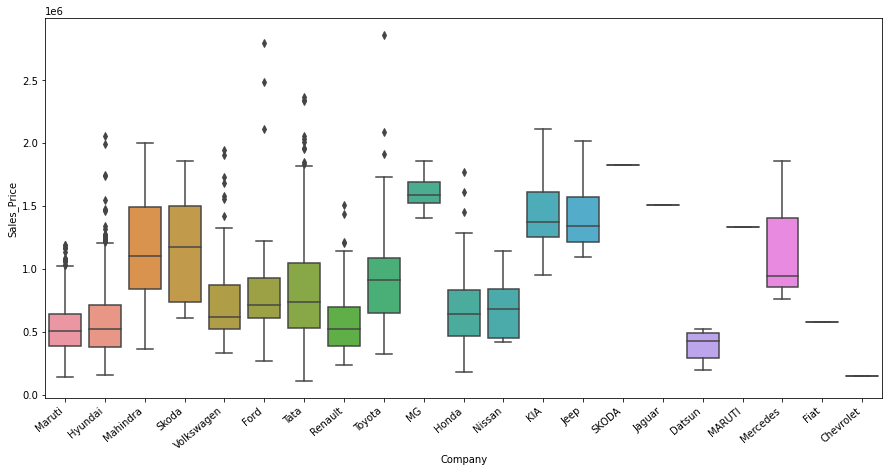

In [9]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Company',y='Sales_Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Sales Price

In [10]:
import warnings
warnings.filterwarnings('ignore')

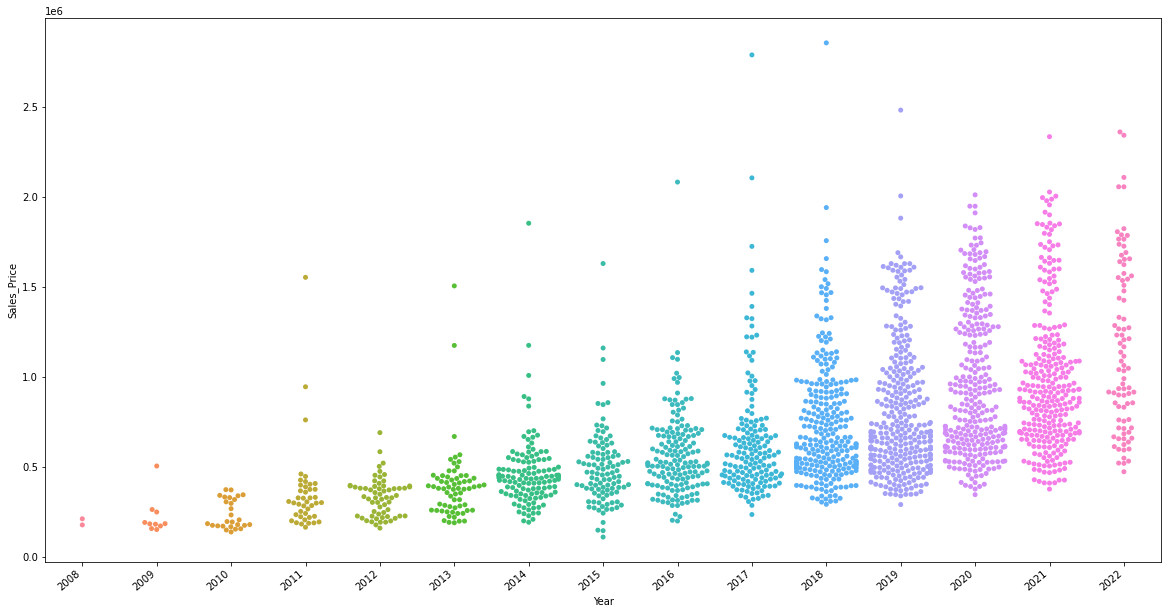

In [11]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Sales_Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of KM_Driven with Sales Price

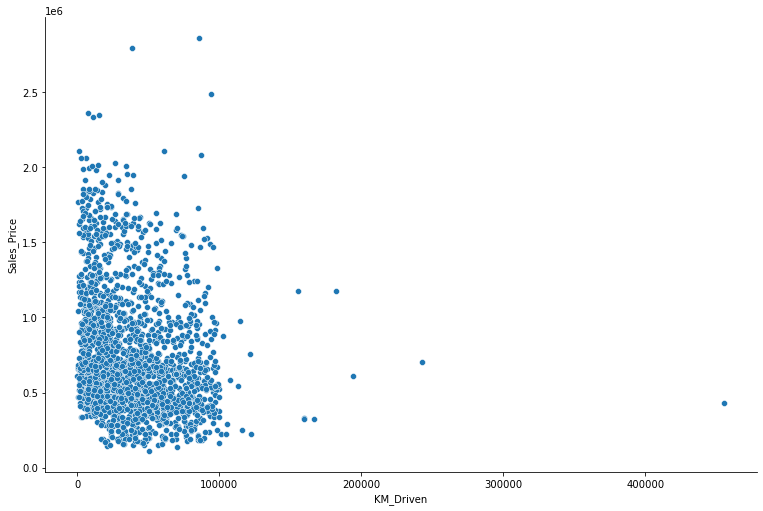

In [12]:
sns.relplot(x='KM_Driven',y='Sales_Price',data=cars,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Sales Price

<AxesSubplot:xlabel='Fuel_Type', ylabel='Sales_Price'>

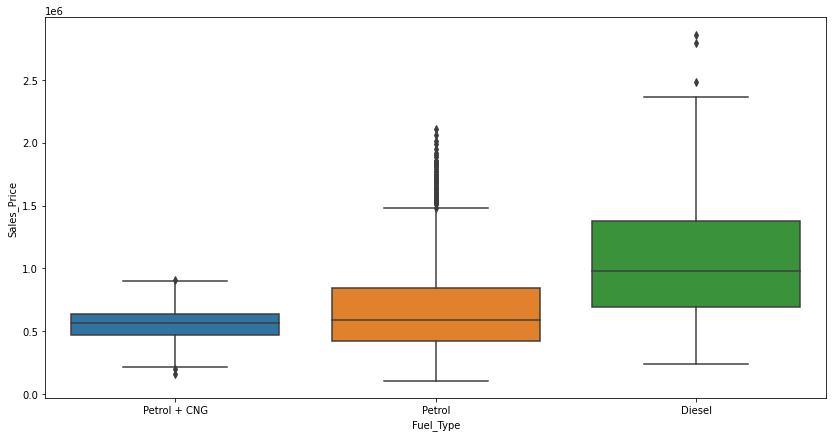

In [13]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Sales_Price',data=cars)

### Relationship of Sales Price with FuelType, Year and Company mixed

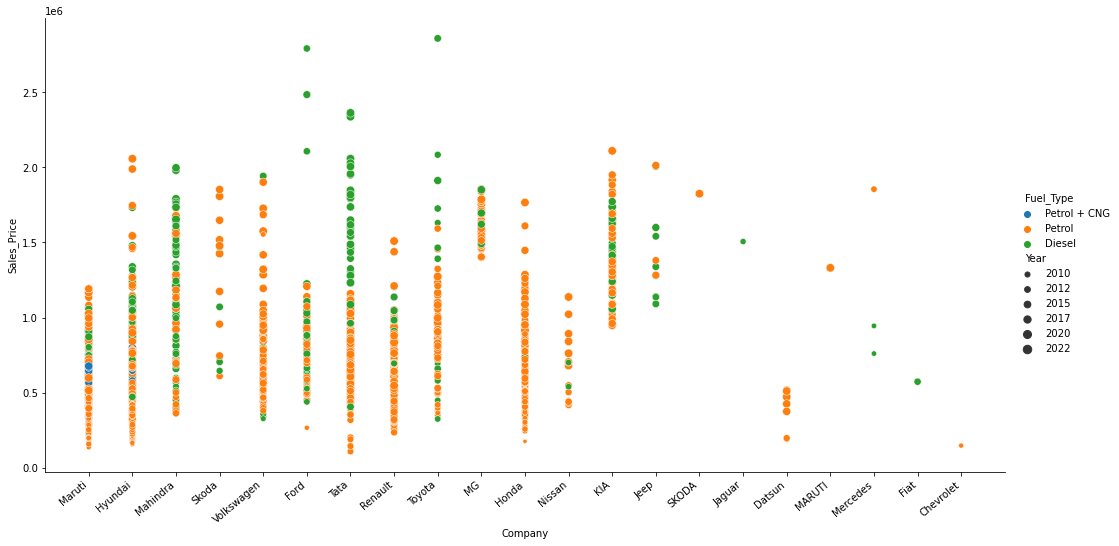

In [14]:
ax=sns.relplot(x='Company',y='Sales_Price',data=cars,hue='Fuel_Type',size='Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Checking relationship of EMI with Sales Price for hue as Company

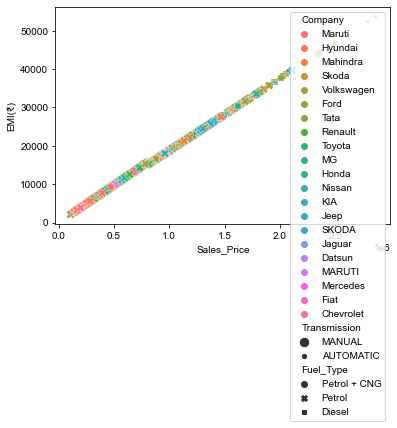

In [15]:
sns.scatterplot (x= "Sales_Price" , y = "EMI(₹)" , hue = "Company" , style = "Fuel_Type" , size = "Transmission" , data = cars   )
sns.set(rc= {'figure.figsize' :(14.7 , 9.27)})

# Model Building:

## 1. Linear Regression:


### Extracting Training Data

In [16]:
x=cars[['Name','Company','Transmission','Year','KM_Driven','Fuel_Type','City']]
y=cars['Sales_Price']

In [17]:
x

,Name,Company,Transmission,Year,KM_Driven,Fuel_Type,City
0,Maruti New Wagon-R LXI CNG 1.0 L,Maruti,MANUAL,2020,20724,Petrol + CNG,New Delhi
1,Maruti Celerio ZXI OPT AMT,Maruti,AUTOMATIC,2017,87848,Petrol,Hyderabad
2,Hyundai i10 ERA 1.1 IRDE,Hyundai,MANUAL,2010,60476,Petrol,Kochi
3,Maruti Alto 800 LXI,Maruti,MANUAL,2013,40700,Petrol,Chennai
4,Mahindra XUV 3OO W8 (O) AT,Mahindra,MANUAL,2021,4022,Petrol,Pune
...,...,...,...,...,...,...,...
2026,Renault Duster RXZ CVT 1.3 TURBO,Renault,AUTOMATIC,2021,10821,Petrol,New Delhi
2027,KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE,KIA,MANUAL,2022,1114,Petrol,Bangalore
2028,Volkswagen Polo HIGH LINE PLUS 1.0,Volkswagen,MANUAL,2020,17595,Petrol,Pune
2029,Renault TRIBER 1.0 RXZ,Renault,MANUAL,2020,33419,Petrol,Hyderabad


In [18]:
y.shape

(2031,)

### Applying Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [21]:
OHE=OneHotEncoder()
OHE.fit(x[['Name','Company','Transmission','Fuel_Type','City']])

OneHotEncoder()

In [22]:
column_trans=make_column_transformer((OneHotEncoder(categories=OHE.categories_),['Name','Company','Transmission','Fuel_Type','City']),
                                    remainder='passthrough')

## Azure ML Pipeline Model :

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
pipe = make_pipeline(column_trans,lr)

In [26]:
# Display pipeline
from sklearn import set_config
set_config(display='diagram')

In [27]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Chevrolet Beat LS PETROL', 'Datsun Go Plus T (O) CVT',
       'Datsun Go T', 'Datsun Redi Go 1.0 T(O)', 'Datsun Redi Go T (O)',
       'Fiat URBAN CROSS EMOTION MULTIJET 1.3',
       'Ford Ecosport 1.0 ECOBOOST TITANIUM',
       'Ford Ecosport 1.0 ECOBOOST TITANIUM OPT',
       'F...
       'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['AUTOMATIC', 'MANUAL'], dtype=object),
                                                                            array(['Diesel', 'Petrol', 'Petrol + CNG'], dtype=object),
                                                                            array(['Ahmedabad', 'Bangalore', 'Chennai', 'Howrah', 'Hyderabad',
       'Indore', 'Jaipur', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'New Delhi', 'Pune'], dtype=object)]),
                                                  ['Name', 'Company',
                                                   'Transmission', 'Fuel_Type',
                                                   'City'])])),
                ('linearregression', LinearRegression())])

In [28]:
y_pred = pipe.predict(x_test)

In [29]:
r2_score(y_test,y_pred)

0.8661280826929912

#### Finding the model with a random state of TrainTestSplit :

In [30]:
scores=[]
for i in range(2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [31]:
np.argmax(scores)

1271

In [32]:
scores[np.argmax(scores)]

0.926249789254573

## Actual Vs Predicted :

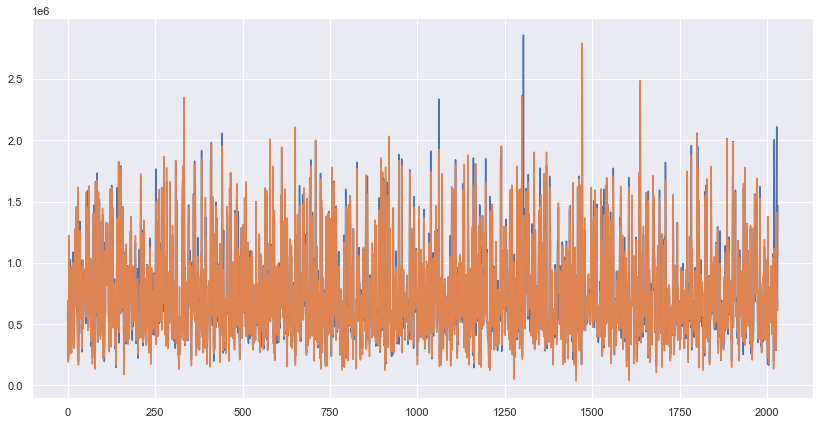

In [33]:
#Comparing original Data's Scatterplot with Regressed model
plt.subplots(figsize=(14,7))
plt.plot(cars.Sales_Price)
plt.plot(pipe.predict(cars))      
plt.show()

### From this model we can predict sales price of the future upcoming cars :

In [34]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Renault TRIBER 1.0 RXZ','Renault','MANUAL',2018,33419,'Petrol','Hyderabad']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [634700.27]


In [35]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Hyundai Creta 1.6 SX AT CRDI','Hyundai','AUTOMATIC',2015,17439,'Diesel','Bangalore']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [1202097.43]


In [36]:
price = pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['KIA SELTOS GTX PLUS 1.4G DCT DUAL TONE','KIA','MANUAL',2022,5842,'Diesel','Pune']).reshape(1,7)))
print("The sales price will be:", np.round(price,2))

The sales price will be: [1575895.29]


## 2. Random Forest Regressor :

In [37]:
# One Hot Encoding
cr7 = pd.get_dummies(cars,columns=['Name','Company','Transmission','Owner','Fuel_Type','City']) 

In [38]:
x1=cr7.drop(['Registration','Month','Original_Price','EMI(₹)','Sales_Price'], axis=1)
y1=cars[['Sales_Price']]
x1.head()

,Year,KM_Driven,Name_Chevrolet Beat LS PETROL,Name_Datsun Go Plus T (O) CVT,Name_Datsun Go T,Name_Datsun Redi Go 1.0 T(O),Name_Datsun Redi Go T (O),Name_Fiat URBAN CROSS EMOTION MULTIJET 1.3,Name_Ford Ecosport 1.0 ECOBOOST TITANIUM,Name_Ford Ecosport 1.0 ECOBOOST TITANIUM OPT,...,City_Howrah,City_Hyderabad,City_Indore,City_Jaipur,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_New Delhi,City_Pune
0,2020,20724,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2017,87848,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2010,60476,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2013,40700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,4022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

#### RandomForestRegressor :

In [40]:
kfold = KFold(n_splits=7, random_state=14, shuffle=True)
RandomForest = RandomForestRegressor(n_estimators=62, criterion='mse', max_features=7)

In [41]:
results = cross_val_score(RandomForest, x1, y1, cv=kfold)
print(results.mean())

0.7541034597156882


## 3. Decision Tree Regressor :

In [43]:
pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13150 sha256=0fb40a5f32be559519e613f20aa514990a11ffb0ad955a082196f2f0c3def163
  Stored in directory: c:\users\ashwini\appdata\local\pip\cache\wheels\5c\80\75\b631985b161d4a29cc0cf94b5f64b00be6297b0968ff1337ce
Successfully built ppscore
Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn import preprocessing
import ppscore as pps

In [45]:
cars2 = pd.read_csv('carsEDA.csv')
cars2.shape

(2031, 13)

##### Label Encoding:

In [46]:
label_encoder = preprocessing.LabelEncoder()
cars2['Name']= label_encoder.fit_transform(cars2['Name'])
cars2['Company']= label_encoder.fit_transform(cars2['Company'])
cars2['Transmission']= label_encoder.fit_transform(cars2['Transmission'])
cars2['Fuel_Type']= label_encoder.fit_transform(cars2['Fuel_Type'])
cars2['Owner']= label_encoder.fit_transform(cars2['Owner'])
cars2['Month']= label_encoder.fit_transform(cars2['Month'])
cars2['City']= label_encoder.fit_transform(cars2['City'])

In [47]:
x2=cars2.drop(['Original_Price','Registration','EMI(₹)','Sales_Price'], axis=1)
y2=cars2[['Sales_Price']]
x2.head()

,Name,Year,Company,Transmission,KM_Driven,Fuel_Type,Owner,City,Month
0,387,2020,12,1,20724,2,0,11,11
1,358,2017,12,0,87848,1,0,4,4
2,198,2010,5,1,60476,1,1,7,1
3,332,2013,12,1,40700,1,0,2,5
4,310,2021,11,1,4022,1,0,12,2


#### Checking pp score :

In [48]:
pps.matrix(cars2)        #calculate the whole PPS matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Name,Name,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Name,Year,0.412273,regression,True,mean absolute error,2.331856,1.370494,DecisionTreeRegressor()
2,Name,Company,0.998326,regression,True,mean absolute error,4.707533,0.007881,DecisionTreeRegressor()
3,Name,Transmission,0.647782,regression,True,mean absolute error,0.170852,0.060177,DecisionTreeRegressor()
4,Name,KM_Driven,0.071517,regression,True,mean absolute error,22255.722797,20664.065252,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,EMI(₹),City,0.000000,regression,True,mean absolute error,3.551452,4.397045,DecisionTreeRegressor()
165,EMI(₹),Original_Price,0.903290,regression,True,mean absolute error,318850.045298,30835.857044,DecisionTreeRegressor()
166,EMI(₹),Sales_Price,0.995539,regression,True,mean absolute error,301887.073363,1346.682829,DecisionTreeRegressor()
167,EMI(₹),Month,0.000000,regression,True,mean absolute error,3.072871,3.982216,DecisionTreeRegressor()


In [49]:
pps.score(cars2, "Sales_Price", "KM_Driven")

{'x': 'Sales_Price',
 'y': 'KM_Driven',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 22255.722796651895,
 'model_score': 28471.839825675448,
 'model': DecisionTreeRegressor()}

### Decision Tree Regression :

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=21)

In [51]:
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(x_train, y_train)

DecisionTreeRegressor()

In [52]:
DecisionTree.score(x_test,y_test)           #Accuracy

0.5783505356130082

### 4. Decision Tree Regression Using Bagging:

In [49]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingRegressor

In [50]:
cart = DecisionTreeRegressor()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
Bagging = BaggingRegressor(base_estimator=cart, n_estimators=100, random_state=7)
results = cross_val_score(Bagging, x2, y2, cv=kfold)
print(results.mean())

0.7786324052069855


### 5. AdaBoost Regressor:

In [51]:
from sklearn.ensemble import AdaBoostRegressor

In [52]:
kfold = KFold(n_splits=12, random_state=7, shuffle=True)
AdaBoost = AdaBoostRegressor(n_estimators=10, random_state=7)

In [53]:
results = cross_val_score(AdaBoost, x2, y2, cv=kfold)
print(results.mean())

0.4826954795570997


#### RandomForestClassifier :

In [54]:
num_trees = 82
max_features = 4

In [55]:
kfold = KFold(n_splits=8, random_state=27, shuffle=True)
RandomFC = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [56]:
results = cross_val_score(RandomFC, x1, y1, cv=kfold)
print(results.mean())

0.012799165914537362


In [57]:
## We can't classify this dataset.

### Building Decision Tree Classifier (CART) using Gini Criteria :

In [58]:
x_train, x_test,y_train,y_test = train_test_split(x2,y2, test_size=0.22,random_state=18)

In [59]:
from sklearn.tree import DecisionTreeClassifier
DT_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [60]:
DT_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
y_test

,Sales_Price
1933,463899
557,693499
1968,778399
1657,752299
336,960199
...,...
1523,406399
75,292799
1541,1691499
1032,734799


In [62]:
y_test3 = y_test.to_numpy()
y_test3 = np.reshape(y_test3, 447)
y_test3

array([ 463899,  693499,  778399,  752299,  960199, 1477999, 1190299,
        685299,  386699,  499299,  469599,  349499,  462899,  474199,
        312999, 1137199,  519599, 1610199,  566799,  611399,  789099,
        535699, 1264799,  240399,  908999, 1439949,  616699,  887099,
        692899,  406499, 1403899,  699899,  474499,  471399, 1265999,
       1734099,  454499,  475699,  841499,  514099,  284199,  662199,
        568849,  393299,  272899,  759799,  508199,  693599,  557999,
       1279699,  558299,  492399,  482599,  288699, 1325499,  882999,
        554099,  680099, 1600599,  622299,  526699,  709199,  885899,
        673899,  960499, 1329899, 1087699,  493599, 1328099, 1071399,
       1480599, 1049399,  446099, 1839099,  485899,  514099,  379799,
        152999,  292599,  286899, 1269899,  430435,  678099,  849899,
        354499,  526399,  597199,  607999, 1790099,  666499, 2083499,
       1491499,  348699,  410699, 1109899,  379799,  668499, 1228399,
        178299, 1267

In [63]:
#Prediction and computing the accuracy
pred=DT_gini.predict(x_test)
pred

array([198199, 387299, 387299, 387299, 387299, 387299, 387299, 387299,
       198199, 387299, 198199, 388499, 387299, 387299, 388499, 387299,
       387299, 387299, 198199, 387299, 387299, 387299, 387299, 198199,
       387299, 387299, 387299, 531299, 387299, 198199, 387299, 573199,
       198199, 198199, 387299, 387299, 313999, 387299, 387299, 198199,
       388499, 687199, 387299, 198199, 198199, 387299, 387299, 198199,
       387299, 387299, 388499, 198199, 387299, 198199, 387299, 387299,
       387299, 387299, 387299, 387299, 387299, 387299, 387299, 387299,
       387299, 387299, 387299, 387299, 387299, 387299, 387299, 387299,
       388499, 387299, 198199, 198199, 198199, 198199, 388499, 198199,
       387299, 388499, 387299, 387299, 198199, 387299, 387299, 387299,
       387299, 387299, 388499, 387299, 313999, 198199, 387299, 198199,
       198199, 387299, 198199, 387299, 387299, 387299, 387299, 388499,
       198199, 387299, 687199, 198199, 387299, 387299, 198199, 387299,
      

In [64]:
# Checking whether any values are same or not in both sets 

np.mean(pred==y_test3)

# There is no common criteria for which we can classify this data

0.0

In [65]:
print(r2_score(pred,y_test))

-22.67271725056486


## ANN model :

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [67]:
SQ=Sequential()

SQ.add(Dense(units=2031,activation='swish'))  # Input layer

SQ.add(Dense(units=1100,activation='tanh'))  # Hidden layer 1
SQ.add(Dropout(0.2))

SQ.add(Dense(units=1,activation='linear'))  # Output layer

SQ.compile(optimizer='adam', loss='Huber', metrics=['mse'])  # Compiling


In [68]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,Y_train,Y_test=train_test_split(x2,y2,train_size=0.80,random_state=25)

In [70]:
history=SQ.fit(X_train,Y_train,validation_split=0.2,batch_size=10,epochs=300,callbacks=early_stopping)

Epoch 1/300
130/130 [==============================] - 10s 53ms/step - loss: 738768.6250 - mse: 708293492736.0000 - val_loss: 764622.7500 - val_mse: 734895472640.0000
Epoch 2/300
130/130 [==============================] - 6s 43ms/step - loss: 738626.6875 - mse: 708084563968.0000 - val_loss: 764481.2500 - val_mse: 734679007232.0000
Epoch 3/300
130/130 [==============================] - 6s 42ms/step - loss: 738485.0000 - mse: 707873931264.0000 - val_loss: 764339.6875 - val_mse: 734462607360.0000
Epoch 4/300
130/130 [==============================] - 6s 42ms/step - loss: 738343.3750 - mse: 707664281600.0000 - val_loss: 764198.3750 - val_mse: 734246338560.0000
Epoch 5/300
130/130 [==============================] - 6s 42ms/step - loss: 738202.1875 - mse: 707456663552.0000 - val_loss: 764056.9375 - val_mse: 734030331904.0000
Epoch 6/300
130/130 [==============================] - 6s 42ms/step - loss: 738060.8125 - mse: 707250159616.0000 - val_loss: 763915.5000 - val_mse: 733814390784.0000
Epo

130/130 [==============================] - 7s 54ms/step - loss: 724904.7500 - mse: 687988211712.0000 - val_loss: 750767.8750 - val_mse: 713899573248.0000
Epoch 100/300
130/130 [==============================] - 6s 47ms/step - loss: 724771.2500 - mse: 687812444160.0000 - val_loss: 750626.3125 - val_mse: 713687302144.0000
Epoch 101/300
130/130 [==============================] - 7s 56ms/step - loss: 724630.8125 - mse: 687601287168.0000 - val_loss: 750484.9375 - val_mse: 713475162112.0000
Epoch 102/300
130/130 [==============================] - 7s 54ms/step - loss: 724486.1250 - mse: 687401664512.0000 - val_loss: 750343.6250 - val_mse: 713262956544.0000
Epoch 103/300
130/130 [==============================] - 6s 45ms/step - loss: 724341.3125 - mse: 687182839808.0000 - val_loss: 750202.2500 - val_mse: 713050750976.0000
Epoch 104/300
130/130 [==============================] - 7s 57ms/step - loss: 724213.3125 - mse: 687000125440.0000 - val_loss: 750060.8750 - val_mse: 712838742016.0000
Epoch 

Epoch 148/300
130/130 [==============================] - 6s 44ms/step - loss: 717987.0000 - mse: 678014550016.0000 - val_loss: 743840.6875 - val_mse: 703546392576.0000
Epoch 149/300
130/130 [==============================] - 7s 56ms/step - loss: 717850.6875 - mse: 677827444736.0000 - val_loss: 743699.3125 - val_mse: 703336022016.0000
Epoch 150/300
130/130 [==============================] - 7s 53ms/step - loss: 717708.8750 - mse: 677623365632.0000 - val_loss: 743558.0625 - val_mse: 703125848064.0000
Epoch 151/300
130/130 [==============================] - 6s 47ms/step - loss: 717561.6250 - mse: 677409390592.0000 - val_loss: 743416.5625 - val_mse: 702915608576.0000
Epoch 152/300
130/130 [==============================] - 8s 59ms/step - loss: 717407.9375 - mse: 677180211200.0000 - val_loss: 743275.0625 - val_mse: 702705303552.0000
Epoch 153/300
130/130 [==============================] - 7s 55ms/step - loss: 717278.6250 - mse: 676999790592.0000 - val_loss: 743133.7500 - val_mse: 7024950640

Epoch 197/300
130/130 [==============================] - 6s 46ms/step - loss: 711055.0625 - mse: 668106293248.0000 - val_loss: 736913.5000 - val_mse: 693288960000.0000
Epoch 198/300
130/130 [==============================] - 7s 56ms/step - loss: 710917.0000 - mse: 667924103168.0000 - val_loss: 736772.0625 - val_mse: 693080489984.0000
Epoch 199/300
130/130 [==============================] - 7s 53ms/step - loss: 710768.0000 - mse: 667697020928.0000 - val_loss: 736630.6250 - val_mse: 692872151040.0000
Epoch 200/300
130/130 [==============================] - 6s 46ms/step - loss: 710647.7500 - mse: 667538685952.0000 - val_loss: 736489.4375 - val_mse: 692663943168.0000
Epoch 201/300
130/130 [==============================] - 7s 56ms/step - loss: 710514.8125 - mse: 667340767232.0000 - val_loss: 736348.0000 - val_mse: 692455931904.0000
Epoch 202/300
130/130 [==============================] - 6s 45ms/step - loss: 710353.1250 - mse: 667120304128.0000 - val_loss: 736206.6875 - val_mse: 6922477240

Epoch 246/300
130/130 [==============================] - 6s 45ms/step - loss: 704127.5000 - mse: 658307350528.0000 - val_loss: 729986.1875 - val_mse: 683127275520.0000
Epoch 247/300
130/130 [==============================] - 8s 59ms/step - loss: 704002.7500 - mse: 658135056384.0000 - val_loss: 729844.7500 - val_mse: 682920837120.0000
Epoch 248/300
130/130 [==============================] - 7s 54ms/step - loss: 703856.5625 - mse: 657920294912.0000 - val_loss: 729703.5625 - val_mse: 682714595328.0000
Epoch 249/300
130/130 [==============================] - 6s 46ms/step - loss: 703704.6875 - mse: 657729650688.0000 - val_loss: 729562.0625 - val_mse: 682508288000.0000
Epoch 250/300
130/130 [==============================] - 7s 57ms/step - loss: 703565.0625 - mse: 657495359488.0000 - val_loss: 729420.7500 - val_mse: 682302046208.0000
Epoch 251/300
130/130 [==============================] - 7s 53ms/step - loss: 703419.5000 - mse: 657307336704.0000 - val_loss: 729279.3125 - val_mse: 6820956733

Epoch 295/300
130/130 [==============================] - 6s 46ms/step - loss: 697186.3750 - mse: 648578269184.0000 - val_loss: 723058.8750 - val_mse: 673061404672.0000
Epoch 296/300
130/130 [==============================] - 7s 56ms/step - loss: 697034.1250 - mse: 648371961856.0000 - val_loss: 722917.2500 - val_mse: 672856866816.0000
Epoch 297/300
130/130 [==============================] - 6s 47ms/step - loss: 696934.6875 - mse: 648235253760.0000 - val_loss: 722776.0000 - val_mse: 672652525568.0000
Epoch 298/300
130/130 [==============================] - 7s 54ms/step - loss: 696771.7500 - mse: 648007057408.0000 - val_loss: 722634.7500 - val_mse: 672448184320.0000
Epoch 299/300
130/130 [==============================] - 8s 59ms/step - loss: 696639.1250 - mse: 647790329856.0000 - val_loss: 722493.3750 - val_mse: 672244039680.0000
Epoch 300/300
130/130 [==============================] - 7s 54ms/step - loss: 696508.5000 - mse: 647637368832.0000 - val_loss: 722351.9375 - val_mse: 6720396984

In [71]:
ANN_pre=SQ.predict(X_test)

13/13 [==============================] - 1s 24ms/step


In [72]:
print(r2_score(ANN_pre,Y_test))  # Accuracy

-4.5691972182267976e+16


### Epoch Vs Loss (Train & Test Dataset)

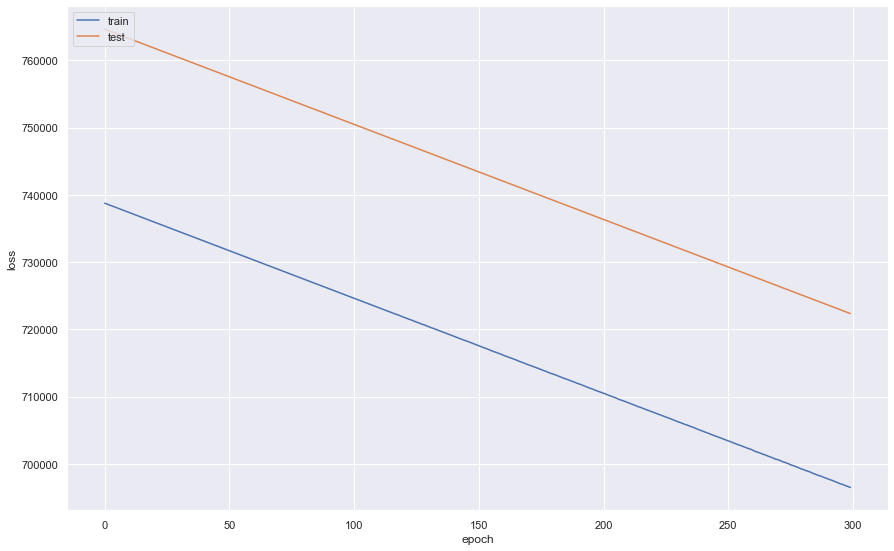

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Epoch Vs Error (Train & Test Dataset)

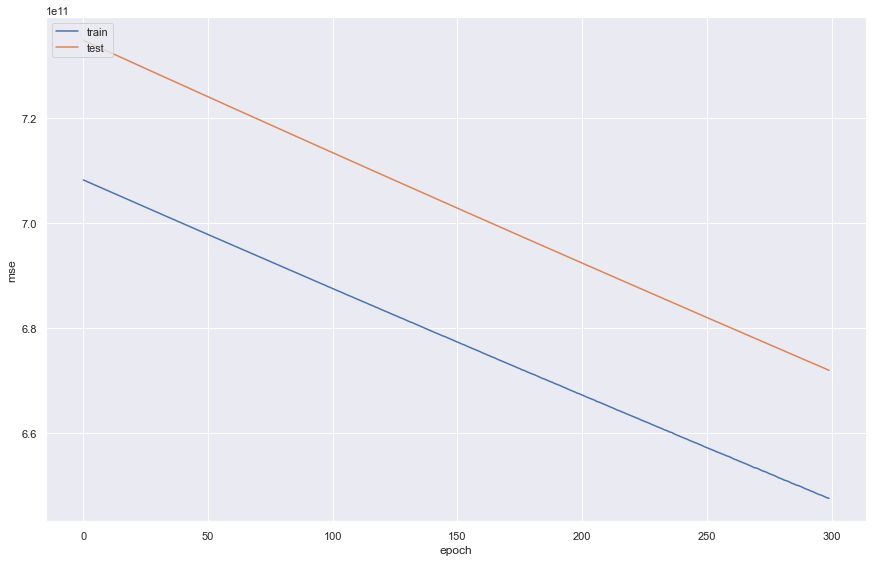

In [74]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [75]:
#pip freeze

absl-py==1.2.0Note: you may need to restart the kernel to use updated packages.
adjustText==0.7.3
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==4.2.0
anaconda-client==1.10.0
anaconda-navigator==2.2.0
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644463701441/work/dist
argh==0.26.2
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569878360/work
asn1crypto @ file:///C:/ci/asn1crypto_1652344143274/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719688889/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3

async-generator==1.10
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
autopep8 @ file:///tmp/build/80754af9/autopep8_16159188551

langcodes==3.3.0
lazy-object-proxy @ file:///C:/ci/lazy-object-proxy_1616529307648/work
libarchive-c @ file:///tmp/build/80754af9/python-libarchive-c_1617780486945/work
libclang==14.0.6
lightgbm==3.3.2
llvmlite==0.38.0
locket @ file:///C:/ci/locket_1652904093019/work
LunarCalendar==0.0.9
lxml @ file:///C:/ci/lxml_1657527495424/work
lz4 @ file:///C:/ci/lz4_1619516660854/work
Markdown==3.4.1
MarkupSafe==2.1.1
matplotlib @ file:///C:/ci/matplotlib-suite_1647423638658/work
matplotlib-inline @ file:///tmp/build/80754af9/matplotlib-inline_1628242447089/work
matplotlib-venn==0.11.7
mccabe==0.6.1
menuinst @ file:///C:/ci/menuinst_1631733428175/work
missingno==0.5.1
mistune==0.8.4
mkl-fft==1.3.1
mkl-random @ file:///C:/ci/mkl_random_1626186184278/work
mkl-service==2.4.0
mlxtend==0.20.0
mock @ file:///tmp/build/80754af9/mock_1607622725907/work
more-itertools @ file:///tmp/build/80754af9/more-itertools_1637733554872/work
mpmath==1.2.1
msgpack @ file:///C:/ci/msgpack-python_1652329319342/work
mult

In [1]:
import pickle

In [37]:
pickle.dump(pipe,open('RegressionModel.pkl','wb'))